# Import Libraries

In [1]:
import pandas as pd #data manipulation
import numpy as np #data transformation
from scipy import stats #stat tests

#visuals
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import and make copy
data = pd.read_csv('data/train.csv')
copy = data.copy()

copy.sample(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1043874,1043874,3,11,9,4,6,5,5,1,3,...,8,6,5,3,2,10,3,3,6,0.555
865568,865568,2,10,2,4,4,4,3,2,3,...,1,4,4,2,5,8,4,4,8,0.420
81071,81071,7,5,5,3,5,5,3,5,4,...,2,5,5,4,5,5,8,5,3,0.485
132960,132960,8,3,3,8,4,3,4,7,2,...,6,3,4,5,3,4,4,5,4,0.405
638239,638239,2,6,7,5,2,3,2,2,4,...,6,3,2,8,7,5,4,7,5,0.460


# Data Overview

In [3]:
#check for nulls
copy.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [6]:
#check for dups
copy.duplicated().sum()

0

In [7]:
#features, dytpes
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Summary:
- no nulls or duplicates
- all dtypes are ints except target

Questions:
- are values ordinal? Will assume so for now

# Exploratory data analysis

In [3]:
#drop id
copy = copy.drop('id', axis=1)
#decribe df
copy.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## Data Distribution

In [12]:
# functions for histograms
def plot_histograms(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].hist(dataframe[feature])
            axs[i, j].set_title(feature)
    plt.suptitle('Histograms')
    plt.show()


#function for boxplots
def plot_boxplots(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].boxplot(dataframe[feature])
            axs[i, j].set_title(feature)
    plt.suptitle('Boxplots')
    plt.show()


#functions for qq plots
def make_qq(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            qqplot(dataframe[feature], line='q', ax=axs[i, j])
            axs[i, j].set_title(feature)
    plt.suptitle('QQ Plots')
    plt.show()


#function for normality tests
def jarque_bera(dataframe, features):
    for feature in features:
        test_stat, p_value = stats.jarque_bera(dataframe[feature])
        print(f"{feature}:\n    Test stat: {test_stat}\n    p_value: {p_value}")

def shapiro(dataframe, features):
    for feature in features:
        test_stat, p_value = stats.shapiro(dataframe[feature])
        print(f"{feature}:\n    Test stat: {test_stat}\n    p_value: {p_value}")

def daugstino(dataframe, features):
    for feature in features:
        test_stat, p_value = stats.normaltest(dataframe[feature])
        print(f"{feature}:\n    Test stat: {test_stat}\n    p_value: {p_value}")
        

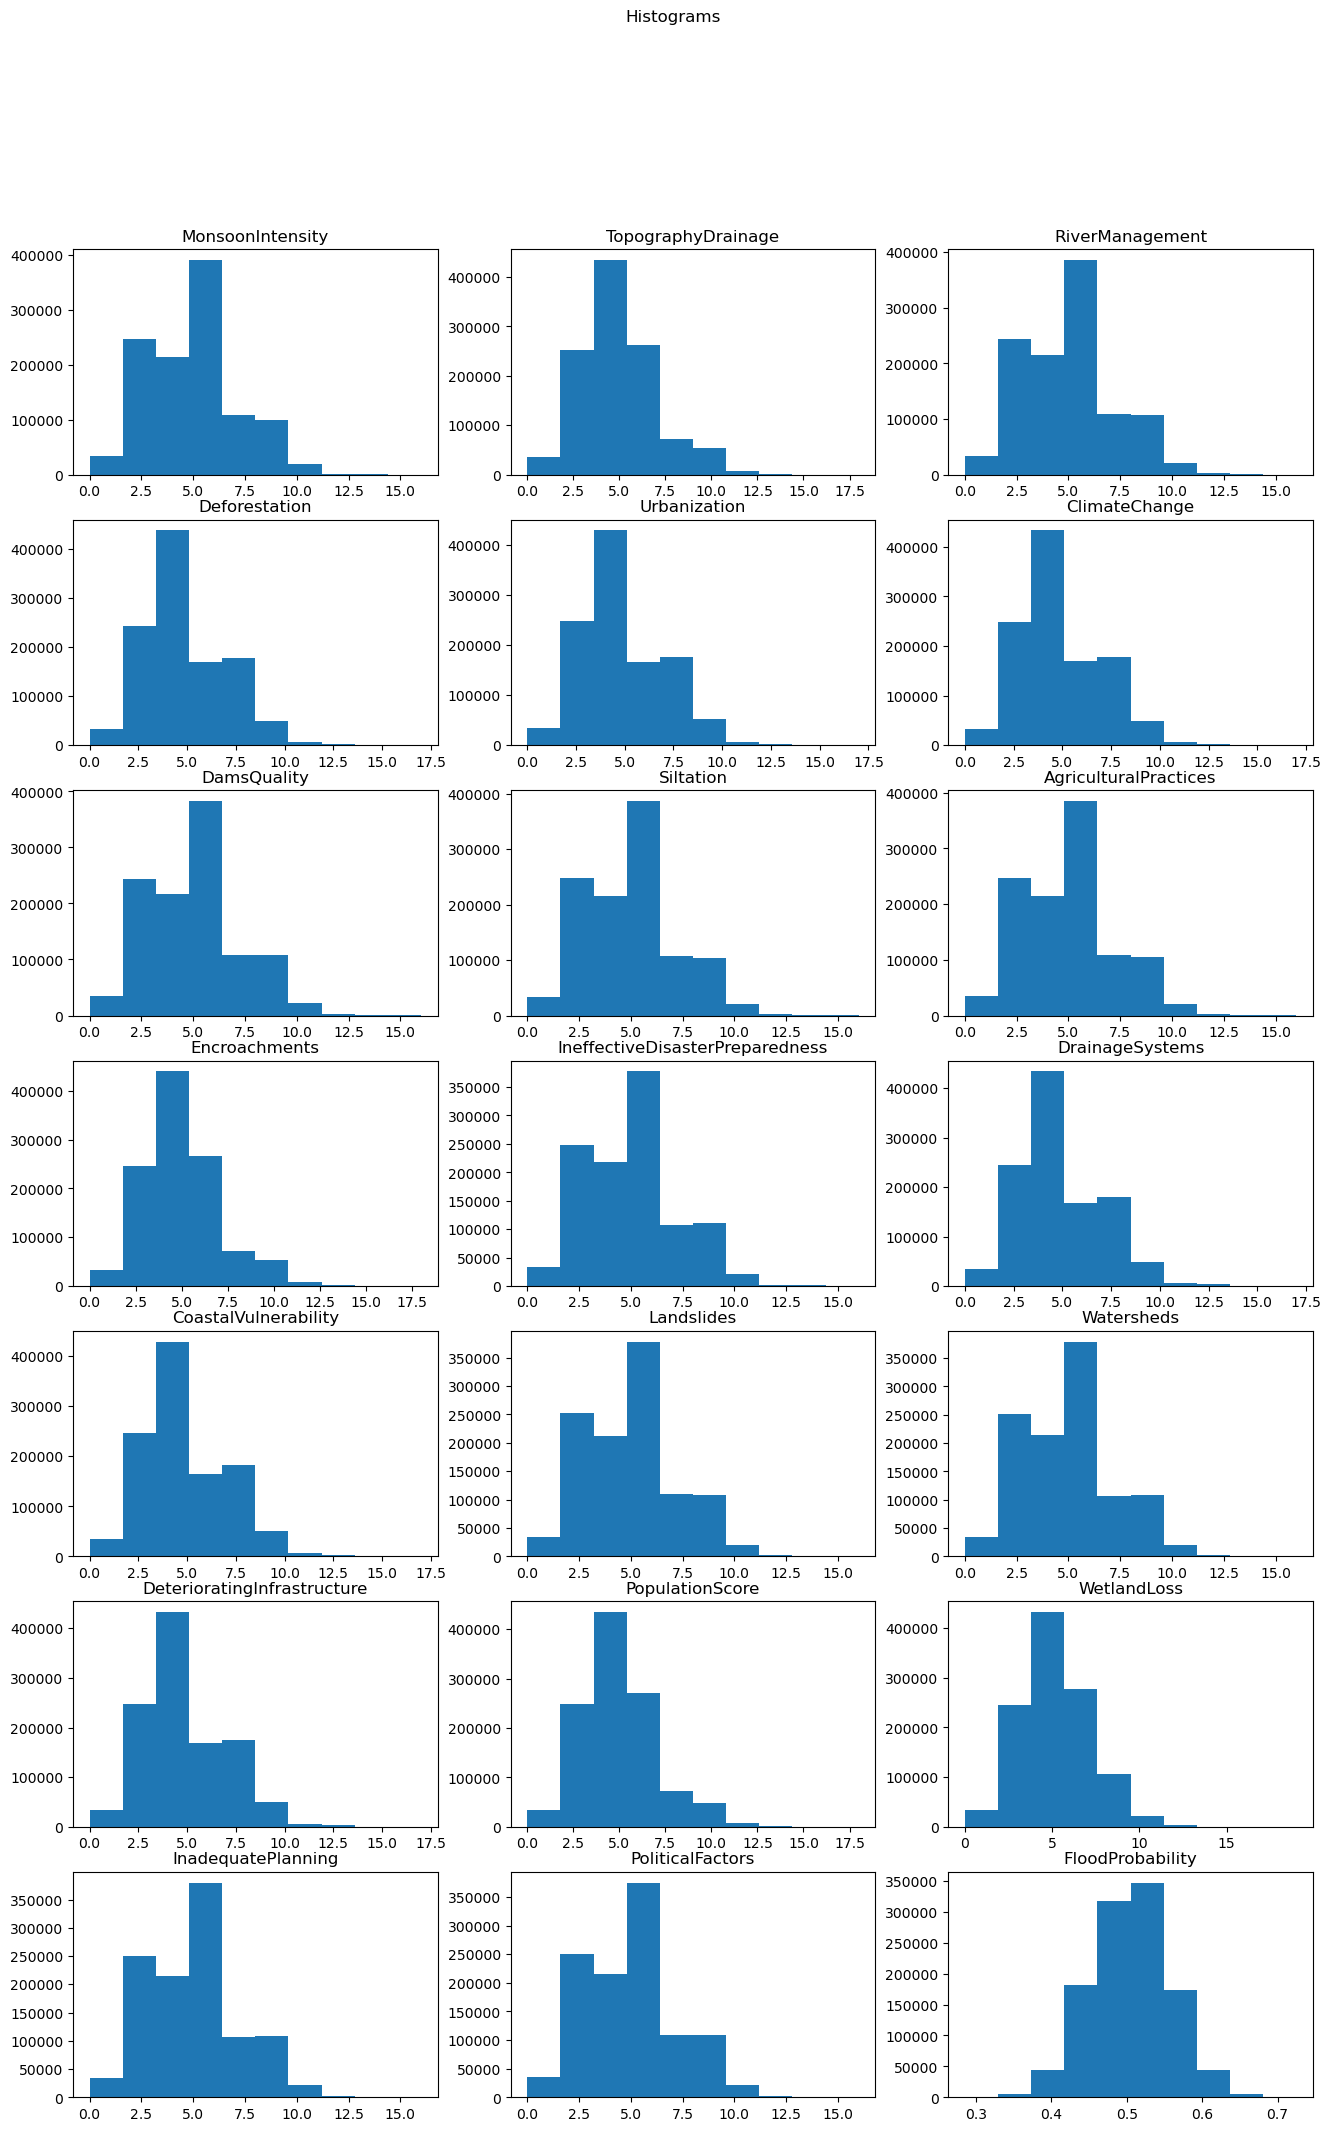

In [5]:
my_features = list(copy.columns)
#histograms
plot_histograms(copy, my_features, 7, 3, (16, 24))

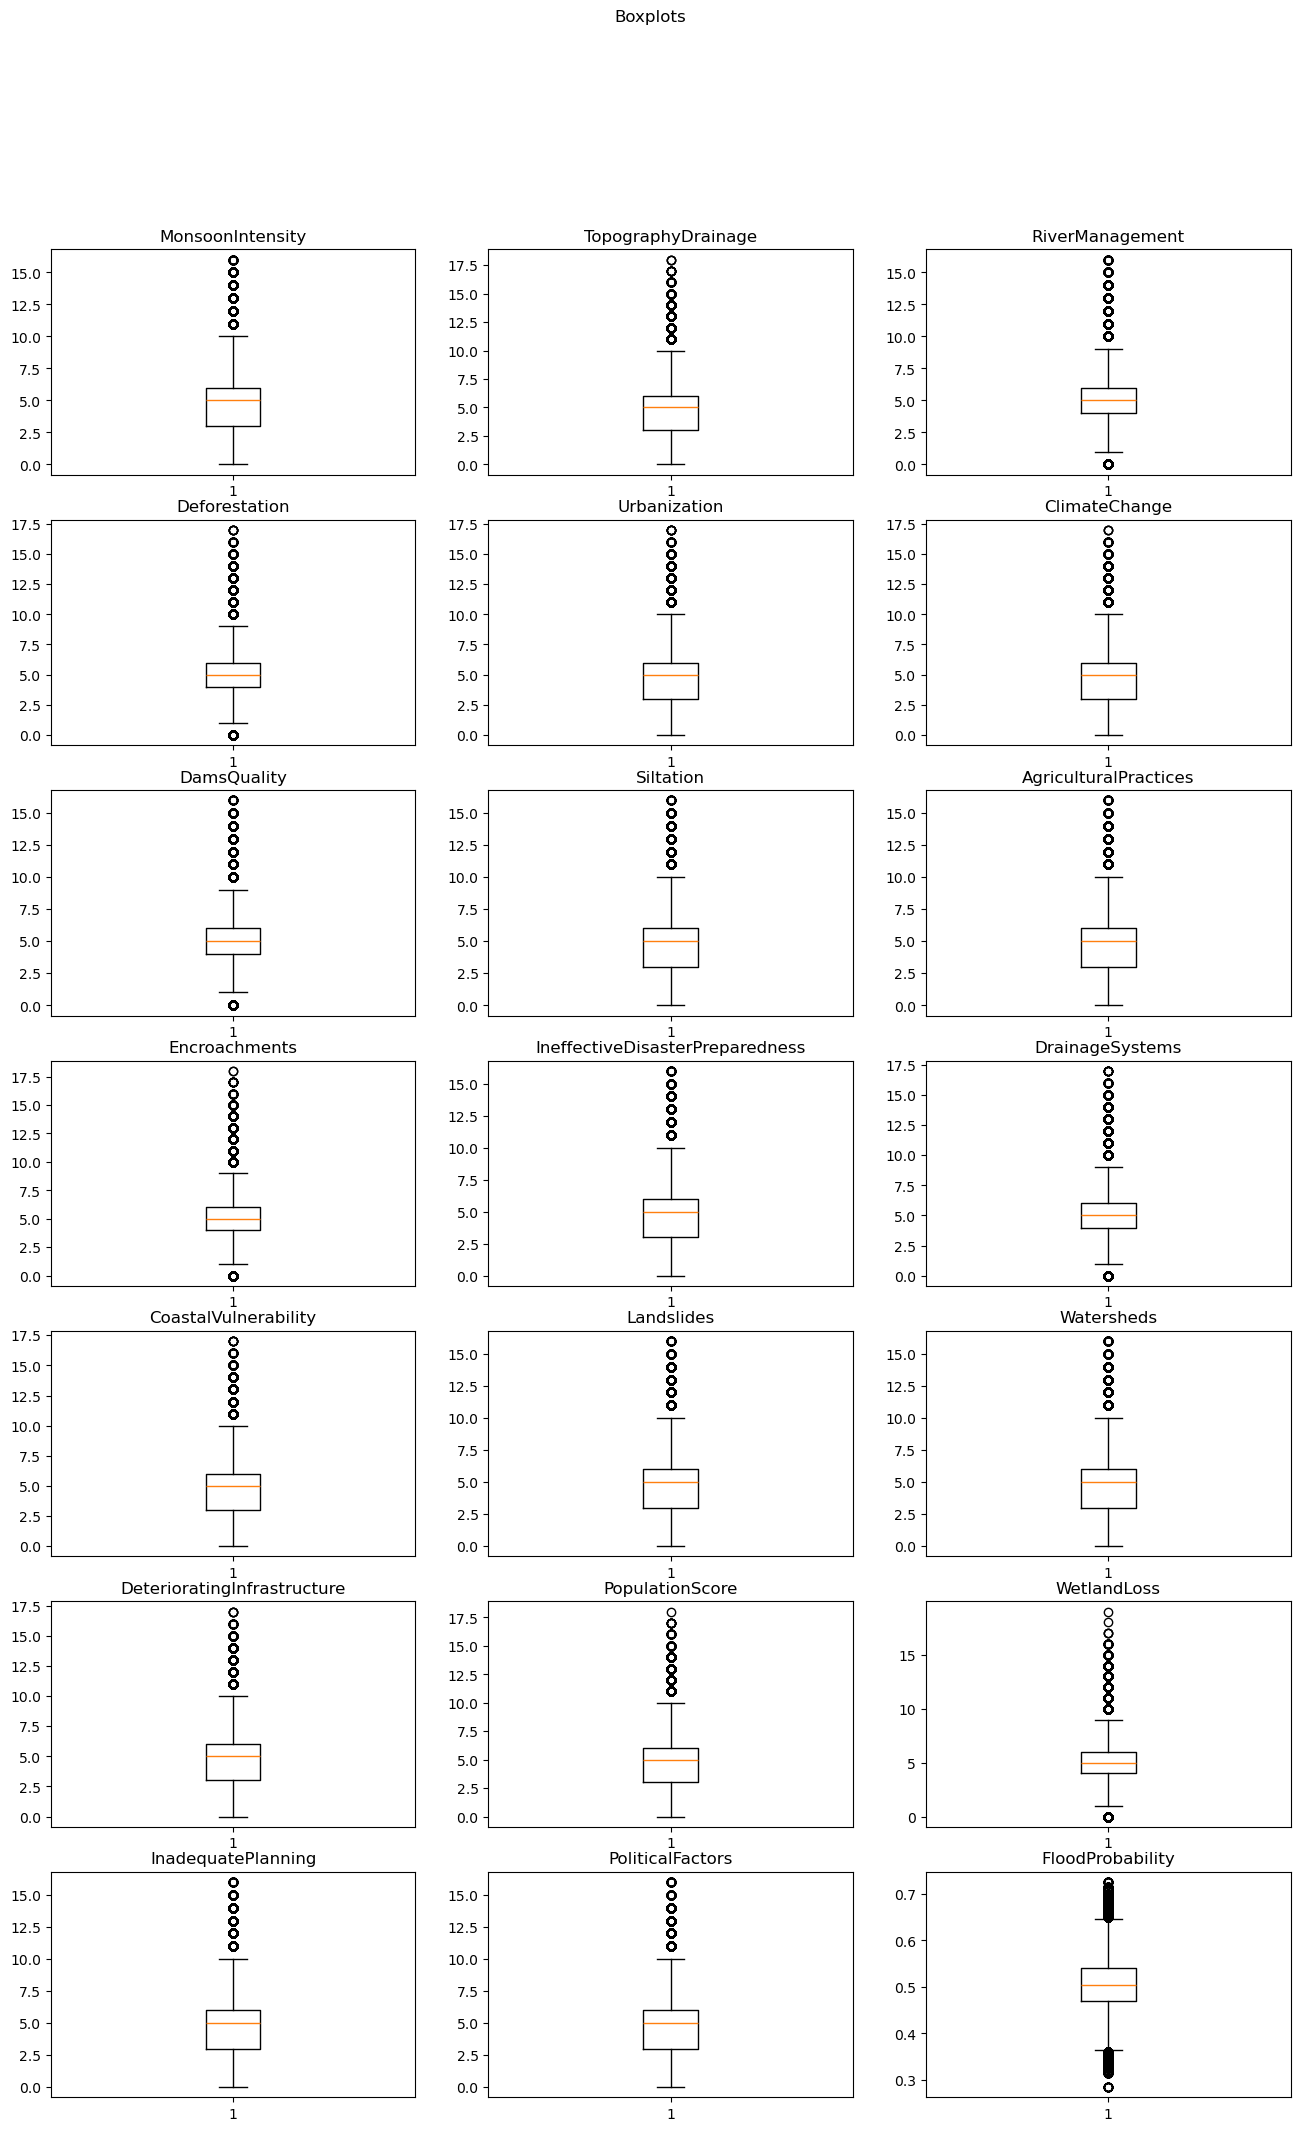

In [14]:
plot_boxplots(copy, copy.columns, 7, 3, (16, 24))

I don't think the outliers matter here as the data is ordinal

In [16]:
#test if data comes from normal distribution
jarque_bera(copy, copy.columns)

MonsoonIntensity:
    Test stat: 42242.567548020415
    p_value: 0.0
TopographyDrainage:
    Test stat: 41855.031048256344
    p_value: 0.0
RiverManagement:
    Test stat: 36232.300023053685
    p_value: 0.0
Deforestation:
    Test stat: 38671.75120033881
    p_value: 0.0
Urbanization:
    Test stat: 39300.21568089843
    p_value: 0.0
ClimateChange:
    Test stat: 37067.35494672611
    p_value: 0.0
DamsQuality:
    Test stat: 39502.1728251271
    p_value: 0.0
Siltation:
    Test stat: 41444.31979738303
    p_value: 0.0
AgriculturalPractices:
    Test stat: 35182.272750346245
    p_value: 0.0
Encroachments:
    Test stat: 43348.168823529944
    p_value: 0.0
IneffectiveDisasterPreparedness:
    Test stat: 38647.4179648571
    p_value: 0.0
DrainageSystems:
    Test stat: 40338.44174368026
    p_value: 0.0
CoastalVulnerability:
    Test stat: 38720.39709303771
    p_value: 0.0
Landslides:
    Test stat: 35273.48747822952
    p_value: 0.0
Watersheds:
    Test stat: 40443.50094671453
    p_v

In [5]:
#shaprio test
shapiro(copy, copy.columns)

/tmp/ipykernel_536908/637909745.py:35: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1117957.
  test_stat, p_value = stats.shapiro(dataframe[feature])


MonsoonIntensity:
    Test stat: 0.9689536006463146
    p_value: 1.3916435625247473e-119
TopographyDrainage:
    Test stat: 0.9681734733612607
    p_value: 2.6928871790857926e-120
RiverManagement:
    Test stat: 0.9697187757477739
    p_value: 7.221438019607961e-119
Deforestation:
    Test stat: 0.969153201257269
    p_value: 2.130886531281709e-119
Urbanization:
    Test stat: 0.9691628649219786
    p_value: 2.175431030158029e-119
ClimateChange:
    Test stat: 0.9693846421617782
    p_value: 3.502916427687329e-119
DamsQuality:
    Test stat: 0.9692786633752539
    p_value: 2.7887147942178313e-119
Siltation:
    Test stat: 0.9686132245128514
    p_value: 6.766920500738804e-120
AgriculturalPractices:
    Test stat: 0.969929341294867
    p_value: 1.1433793309883135e-118
Encroachments:
    Test stat: 0.9678967229483002
    p_value: 1.516557667387513e-120
IneffectiveDisasterPreparedness:
    Test stat: 0.9686890772704649
    p_value: 7.941717153922731e-120
DrainageSystems:
    Test stat: 0.

In [6]:
#dagostino
daugstino(copy, copy.columns)

MonsoonIntensity:
    Test stat: 37653.817508319575
    p_value: 0.0
TopographyDrainage:
    Test stat: 37784.39247406609
    p_value: 0.0
RiverManagement:
    Test stat: 33091.864214949404
    p_value: 0.0
Deforestation:
    Test stat: 34994.94066186537
    p_value: 0.0
Urbanization:
    Test stat: 35620.314590668386
    p_value: 0.0
ClimateChange:
    Test stat: 33754.79234333242
    p_value: 0.0
DamsQuality:
    Test stat: 35745.095403990956
    p_value: 0.0
Siltation:
    Test stat: 37277.51262683429
    p_value: 0.0
AgriculturalPractices:
    Test stat: 32220.971364498037
    p_value: 0.0
Encroachments:
    Test stat: 38941.37824666719
    p_value: 0.0
IneffectiveDisasterPreparedness:
    Test stat: 35167.453052955214
    p_value: 0.0
DrainageSystems:
    Test stat: 36317.17575075272
    p_value: 0.0
CoastalVulnerability:
    Test stat: 35158.97912228182
    p_value: 0.0
Landslides:
    Test stat: 32350.16626544049
    p_value: 0.0
Watersheds:
    Test stat: 36609.093163121805
   

From the two tests and the histograms, we can see that the data is not normally distributed. We can transform it or use non-parametric tests

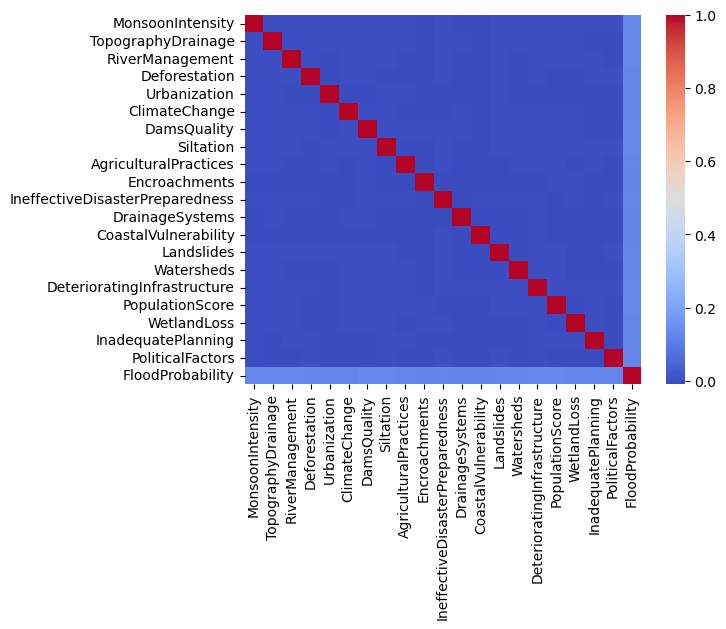

<Figure size 5000x1000 with 0 Axes>

In [15]:
#correlation with spearmane
corr = copy.corr(method='kendall')
sns.heatmap(corr, cmap='coolwarm')
fig = plt.figure(figsize=(50, 10))
plt.show()

## OLS

# Modelling

In [23]:
#import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

In [21]:
#declare data
X = copy.drop('FloodProbability', axis=1)
y = copy['FloodProbability']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

## Base Model

StandardScaler + Linear Regression

In [26]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84506
Test accuracy: 0.84468


In [27]:
#get scores
scores = pipeline.named_steps['model'].coef_
scores

array([0.0115613 , 0.01179326, 0.01171316, 0.01165323, 0.01177047,
       0.01164972, 0.01178978, 0.01165423, 0.0116563 , 0.01178646,
       0.01173999, 0.01167172, 0.01186623, 0.01170434, 0.01174502,
       0.01157999, 0.01179597, 0.01167529, 0.01167066, 0.01179667])

Given the data is more ordinal, perhaps a RandomForest might be better. 

## Random Forest

Standardscaler + RandomForest

In [28]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

: 

: 